In [8]:
from itertools import chain
from random import random

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

from society.action import Action
from society.agent import Agent
from society.simulations.adaptive import AdaptiveSimulation
from society.agents.constant import AllC, AllD
from society.agents.qlearning import TabularQLearner, DoubleTabularQLearner
from society.agents.random import Random
from society.agents.tft import TitForTat
from society.visualisation.network import *

# plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.figsize"] = (12, 5)

In [9]:
# def generate_population(communities, size):
#     population = communities * size

#     agents = [
#         TabularQLearner(lookback=1, epsilon=0.1, learning_rate=0.05)
#         for i in range(population)
#     ]

#     G = nx.connected_caveman_graph(communities, size)

#     weights_matrix = np.zeros((population, population))
#     for u, v, d in G.edges(data=True):
#         weights_matrix[u, v] = weights_matrix[v, u] = 1
#         try:
#             d["weight"] = weights_matrix[u, v]
#         except:
#             d["weight"] = 0

#     return agents, weights_matrix, G

In [10]:
def generate_population(communities, size):
    population = communities * size

    agents = [
        DoubleTabularQLearner(
            lookback=2, epsilon=0.1, learning_rate=0.05, discount_factor=0.98
        )
        for i in range(population)
    ]

    agents[0] = TitForTat()

    # G = nx.connected_caveman_graph(communities, size)

    G = nx.Graph()
    G.add_weighted_edges_from([(0, i, 1) for i in range(1, population)])

    weights_matrix = np.zeros((population, population))
    for u, v, d in G.edges(data=True):
        weights_matrix[u, v] = weights_matrix[v, u] = 1
        try:
            d["weight"] = weights_matrix[u, v]
        except:
            d["weight"] = 0

    return agents, weights_matrix, G

In [11]:
# _, _, G = generate_population(2, 16)

# nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [12]:
def compute_policies(agents):
    policies = [
        agent._q_table.argmax(axis=-1) if hasattr(agent, "_q_table") else None
        for agent in agents
    ]

    return [
        "".join(
            [
                ("C", "D")[policy[i, j]]
                for i in range(4)
                for j in range(4)
                # for k in range(4)
            ]
        )
        if policy is not None
        else "OTHER"
        for policy in policies
    ]


def calculate_cooperativeness(history):
    count = history.count(Action.COOPERATE)

    return count / len(history)

In [13]:
PAYOFF_LABELS = ["(C, C)", "(C, D)", "(D, C)", "(D, D)"]
# PAYOFF_LABELS = ["R", "S", "T", "P"]

Run 1:   0%|          | 0/20000 [00:00<?, ?it/s]

BEST AGENT (0): 7326574 (0.888823046875, OTHER)
WORST AGENT (32): 41230 (0.37349457798210983, DCDCCCDCCCCCCDCC)


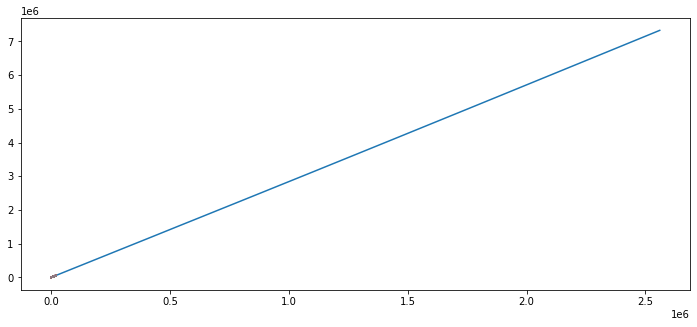

In [14]:
POPULATION = (32, 4)
ROUNDS = 20_000

run_rewards = []
run_cumulative_rewards = []
# run_action_histories = []
run_reward_histories = []
run_policies = []

for run in range(1):
    # Generate a new population
    agents, weights_matrix, G = generate_population(*POPULATION)

    # Run a number of rounds
    sim = AdaptiveSimulation(agents, weights_matrix)

    # Run the simulation
    sim.reset()
    for i in tqdm(range(ROUNDS), desc=f"Run {run + 1}"):
        sim.play_round(train=True)

    # Store results
    run_rewards.append(sim.rewards)
    # run_action_histories.append(sim.action_histories)
    run_reward_histories.append(sim.reward_histories)
    run_policies.append(compute_policies(agents))

    # Output statistics for the best and worst agents
    cumulative_rewards = [
        (i, sum(history)) for i, history in enumerate(sim.reward_histories)
    ]
    cumulative_rewards.sort(key=lambda x: x[1], reverse=True)

    tqdm.write(
        f"BEST AGENT ({cumulative_rewards[0][0]}): {cumulative_rewards[0][1]} ({calculate_cooperativeness(list(chain(*sim.action_histories[cumulative_rewards[0][0]])))}, {run_policies[-1][cumulative_rewards[0][0]]})"
    )
    tqdm.write(
        f"WORST AGENT ({cumulative_rewards[-1][0]}): {cumulative_rewards[-1][1]} ({calculate_cooperativeness(list(chain(*sim.action_histories[cumulative_rewards[-1][0]])))}, {run_policies[-1][cumulative_rewards[-1][0]]})"
    )

    for rh in sim.reward_histories:
        plt.plot(np.cumsum(rh))

    plt.show()

In [15]:
# plot_matrix(sim.produce_weight_matrix(), digits=2, figsize=(60, 36))

In [16]:
# plot_matrix(sim.frequencies, digits=0, figsize=(60, 36))

In [17]:
sim.calculate_weights()

[array([0.82300191, 0.81683626, 0.80708775, 0.10381107, 0.81423925,
        0.82150188, 0.81815936, 0.75625608, 0.78303653, 0.81876909,
        0.82087404, 0.80342206, 0.46571035, 0.81022251, 0.54544081,
        0.81003567, 0.814649  , 0.35156867, 0.13376511, 0.80889466,
        0.82400209, 0.81408471, 0.80739728, 0.7624605 , 0.80809287,
        0.23031771, 0.23007664, 0.69485787, 0.68877475, 0.75597505,
        0.81697747, 0.05      , 0.75508681, 0.80532507, 0.81428075,
        0.81906354, 0.22684785, 0.82268004, 0.73711038, 0.23016647,
        0.81424587, 0.22915321, 0.74876519, 0.81496794, 0.81922646,
        0.80642143, 0.80622544, 0.82151939, 0.81991636, 0.81903397,
        0.80793277, 0.81499531, 0.82189236, 0.52445536, 0.73866642,
        0.81503134, 0.30419095, 0.3608255 , 0.75455601, 0.82047619,
        0.17725214, 0.81572735, 0.81617746, 0.81358578, 0.74956429,
        0.82126663, 0.73275162, 0.29763443, 0.82978867, 0.25680275,
        0.80152383, 0.7396017 , 0.19366856, 0.74

In [18]:
sim.action_histories[0][2]

[<Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.DEFECT: 1>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE: 0>,
 <Action.COOPERATE:

In [19]:
cumulative_rewards[0][0]

0

In [20]:
if hasattr(agents[cumulative_rewards[0][0]], "_q_table"):
    print(agents[cumulative_rewards[0][0]]._q_table)

In [21]:
agents[cumulative_rewards[4][0]].play_move(
    [Action.COOPERATE, Action.COOPERATE], [Action.COOPERATE, Action.COOPERATE]
)

<Action.COOPERATE: 0>

In [22]:
agents[1]._q_table

array([[[2.99925206e+02, 2.97596776e+02],
        [0.00000000e+00, 0.00000000e+00],
        [2.93672397e+02, 1.73438232e+01],
        [0.00000000e+00, 0.00000000e+00]],

       [[2.99875073e+02, 1.70336645e+02],
        [0.00000000e+00, 0.00000000e+00],
        [1.58460973e+02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00],
        [2.99795556e+02, 5.73471924e+01],
        [0.00000000e+00, 0.00000000e+00],
        [5.75204241e+01, 5.00000000e-02]],

       [[0.00000000e+00, 0.00000000e+00],
        [1.68254549e+02, 3.48115771e+00],
        [0.00000000e+00, 0.00000000e+00],
        [3.91482578e+00, 0.00000000e+00]]])

In [23]:
# from datetime import datetime
# import pickle

# with open(f"results - {datetime.isoformat(datetime.now()).replace(':', '-')}.pickle", "wb") as f:
#     pickle.dump({
#         "rewards": run_rewards,
#         "cumulative_rewards": run_cumulative_rewards,
#         # "action_histories": run_action_histories,
#         "reward_histories": run_reward_histories,
#         "policies": run_policies,
#     }, f)

In [24]:
cumulative_reward_policy_ranks = {}
cumulative_reward_policies = {}

for policies, reward_histories in zip(run_policies, run_reward_histories):
    cumulative_rewards = [
        (i, sum(history)) for i, history in enumerate(reward_histories)
    ]
    cumulative_rewards.sort(key=lambda x: x[1], reverse=True)

    for rank, (i, cumulative_reward) in enumerate(cumulative_rewards):
        policy = policies[i]

        if policy not in cumulative_reward_policy_ranks:
            cumulative_reward_policy_ranks[policy] = []
            cumulative_reward_policies[policy] = []

        cumulative_reward_policy_ranks[policy].append(rank + 1)
        cumulative_reward_policies[policy].append(cumulative_reward)

mean_cumulative_reward_policy_ranks = {
    policy: np.mean(ranks) for policy, ranks in cumulative_reward_policy_ranks.items()
}
mean_cumulative_reward_policies = {
    policy: np.mean(rewards) for policy, rewards in cumulative_reward_policies.items()
}

In [25]:
for policy in sorted(
    mean_cumulative_reward_policy_ranks,
    key=lambda x: mean_cumulative_reward_policy_ranks[x],
):
    print(f"{mean_cumulative_reward_policy_ranks[policy]:<24} {policy}")

1.0                      OTHER
42.80821917808219        CCCCCCCCCCCCCCCC
65.5                     CCCCCCCCCCCDCCCC
73.0                     CCCCCCCCCCCCCCCD
80.0                     CCCCCCCCCCCCCDCC
86.0                     CCDCCCCCCCCCCCCC
92.11111111111111        CCDCCCDCCCCCCCCC
105.2                    CCDCCCCCCCCDCCCC
109.0                    CCCCDCCCCCCCCCCC
111.5                    CCDCCCDCCCCDCCCC
112.5                    DCCCCCCCCCCCCCCC
116.0                    DCCCCCCCCCCCCDCC
118.0                    DCCCCCDCCCCCCCCC
120.0                    CCDCCCCCCCCCCDCC
121.0                    DCCCDCCCCCCDCCCC
124.0                    DCCCCCCCCCCDCCCC
126.0                    DCDCCCDCCCCCCCCC
128.0                    DCDCCCDCCCCCCDCC


In [26]:
for policy in sorted(
    mean_cumulative_reward_policies,
    key=lambda x: mean_cumulative_reward_policies[x],
    reverse=True,
):
    print(f"{mean_cumulative_reward_policies[policy]:<24} {policy}")

7326574.0                OTHER
59353.0                  CCCCCCCCCCCCCCCD
59135.602739726026       CCCCCCCCCCCCCCCC
58995.375                CCCCCCCCCCCDCCCC
57520.5                  CCDCCCCCCCCCCCCC
57361.0                  CCCCCCCCCCCCCDCC
56738.11111111111        CCDCCCDCCCCCCCCC
54685.0                  CCCCDCCCCCCCCCCC
54626.8                  CCDCCCCCCCCDCCCC
54554.5                  DCCCCCCCCCCCCCCC
54508.0                  DCCCCCCCCCCCCDCC
54163.0                  DCCCCCDCCCCCCCCC
53739.5                  CCDCCCDCCCCDCCCC
53468.0                  CCDCCCCCCCCCCDCC
52304.0                  DCCCDCCCCCCDCCCC
50376.0                  DCCCCCCCCCCDCCCC
47067.0                  DCDCCCDCCCCCCCCC
41230.0                  DCDCCCDCCCCCCDCC


In [27]:
compute_policies([agents[cumulative_rewards[0][0]]])[0]

'OTHER'

In [28]:
if hasattr(agents[cumulative_rewards[0][0]], "_q_table"):
    print(agents[cumulative_rewards[0][0]]._q_table)

In [29]:
from itertools import product

P = compute_policies([agents[cumulative_rewards[0][0]]])[0]

for m, p in zip(product(PAYOFF_LABELS, PAYOFF_LABELS), P):
    print(m, "=>", p)

('(C, C)', '(C, C)') => O
('(C, C)', '(C, D)') => T
('(C, C)', '(D, C)') => H
('(C, C)', '(D, D)') => E
('(C, D)', '(C, C)') => R
